## Agarwal Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288028,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704871,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

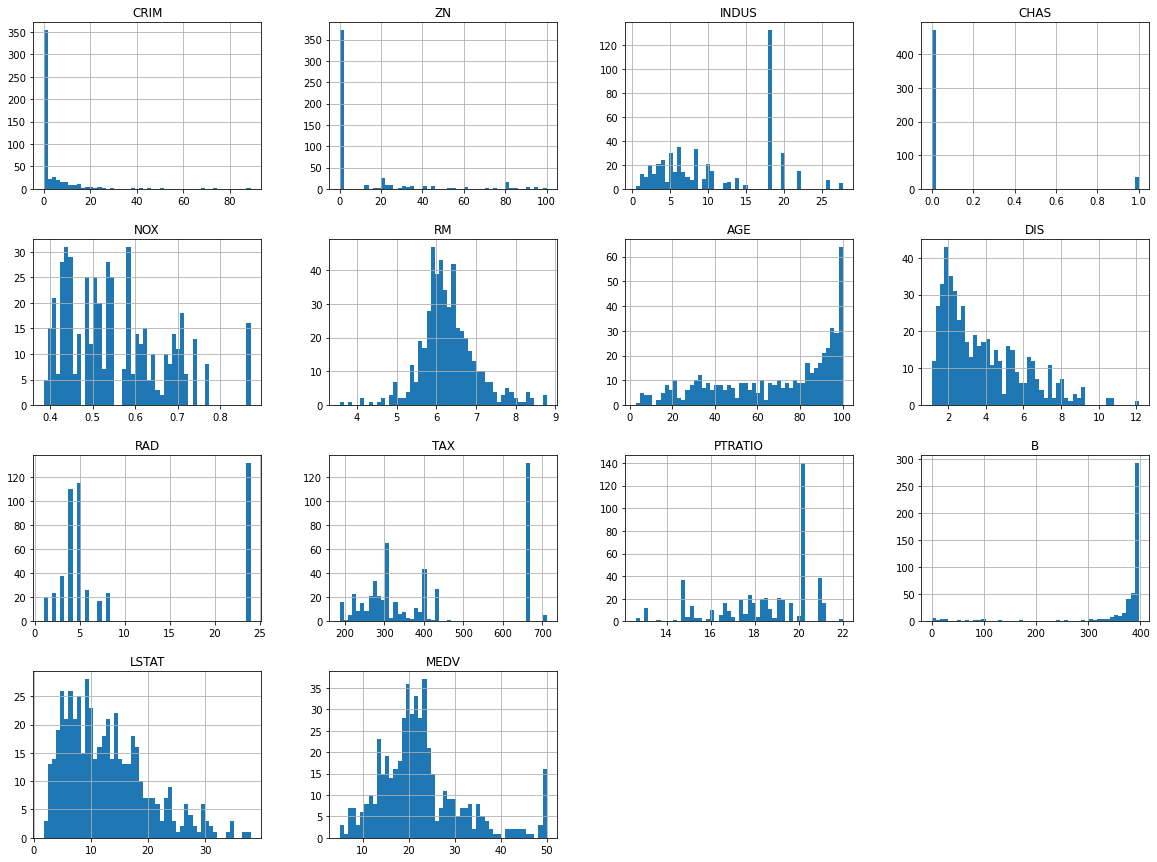

In [8]:
# For Plotting Histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))#

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set {len(test_set)}")

Rows in train set: 404
Rows in test set 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
95/7


13.571428571428571

In [17]:
376/28

13.428571428571429

In [18]:
housing=strat_train_set.copy() # before we started filling missing values

## Looking for Correlations 

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679597
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

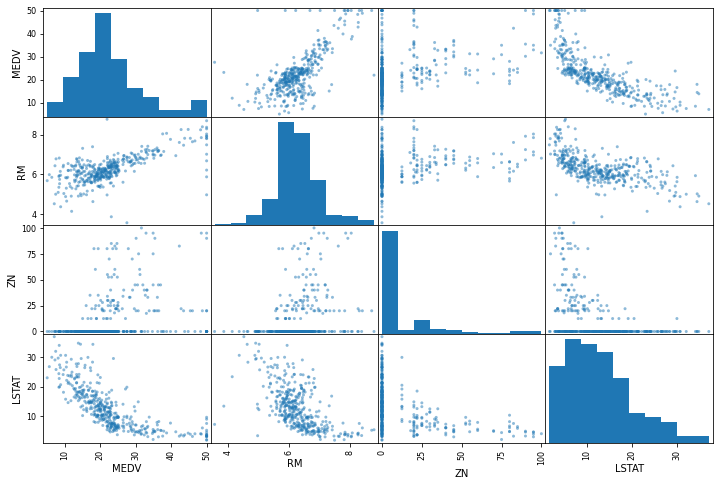

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

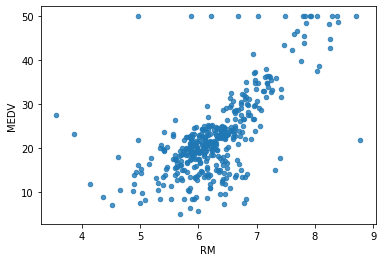

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attributed Combinations

In [22]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679597
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526770
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

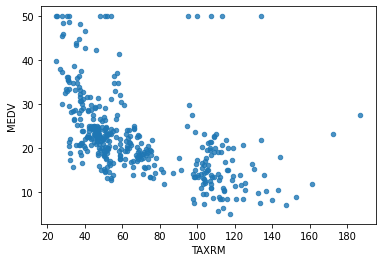

In [25]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
#To take care of missing attribues, we have three options:-
#    1. Get rid of the missing data points.
#    2. Get rid of the whole attribute.
#    3. Set the value of some value(0, mean or median).

In [28]:
a=housing.dropna(subset=["RM"]) # option 1
a.shape
# Note that the original housing dataframe will remain unchanged 

(401, 13)

In [29]:
housing.drop("RM", axis=1).shape # option 2
# Note there is no RM colums and also note that the original housing dataframe will remain unchanged 

(404, 12)

In [30]:
median = housing["RM"].median() # compute median for option 3

In [31]:
median

6.211

In [32]:
housing["RM"].fillna(median)
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

In [34]:
housing.describe() # before we started filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282062,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714979,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281535,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712339,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design


Primarily, there are three types of objects:-
1.Estimators - It estimates some parameter based on a dataset. Eg - imputer.
It has a fir method and transform method.
Fit method - Fits the dataset and calculate internal parameters.

2.Transformers- transform method takes input and returns output based on the learnings from fit(). It also has a convinience function called fit_transform() which fits and then transforms.

3.Predictors - LinearRegression model is an example of predicator. fit() and predict() are two common methods. It also gives score function which will evaluate the predictions. 

## Feature Scaling

Primarily there are two types of feature scaling methods:
1. Min-max scaling(Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMax scaler for this.
2. Standardization
    (value-min)/std
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#  ....... add as many as we want in our pipeline    
    ('std_scaler', StandardScaler()),
])

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Agarwal Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.289, 25.694, 16.489, 23.281, 23.344])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)


In [50]:
rmse

1.187471331597666

## Using better evaluation technique - Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [52]:
rmse_scores

array([2.78222979, 2.60511635, 4.25017318, 2.80586505, 3.50485049,
       2.62074763, 4.68988116, 3.16251268, 3.30693549, 3.39682015])

In [53]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [54]:
print_scores(rmse_scores)

Scores:  [2.78222979 2.60511635 4.25017318 2.80586505 3.50485049 2.62074763
 4.68988116 3.16251268 3.30693549 3.39682015]
Mean:  3.3125131967930246
Standard deviation:  0.6602896369545798


Convert this notebook into a python file and run the pipeline using  visual studio code

## Saving the model

In [55]:
from joblib import dump, load
dump(model, 'Agarwal.joblib')

['Agarwal.joblib']

## Testing the model on Test Data

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.656 11.236 25.215 21.758 18.876 14.662 20.5   14.835 32.023 42.159
 19.693 11.198 23.446 27.062 19.493 11.43  31.644 14.275 23.538 19.225
 20.162 17.708 16.414 22.131 18.625 31.874 16.121 32.958  8.991 33.537
 23.396 21.27  22.657 10.854 21.091 11.106 43.135 24.716 23.432 41.725
 24.14  30.069 20.599 21.132 18.421 33.542 45.33  20.109 19.844 22.279
 21.296 14.719 21.437 15.42  24.812 33.039 42.514 29.15  19.324 20.651
 46.551  9.618 18.933 24.954 14.949 33.065 20.118 17.827 18.949 33.731
 25.808 22.64  21.589 22.372 34.291 12.193 16.12  20.308 21.034 21.608
 22.65  20.673 14.419 22.784 20.725 21.105 14.029 21.391 21.11  23.237
 18.483 27.29   7.129 26.817 19.068 29.313 19.67  31.11  14.422 26.596
 21.235 20.731] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [57]:
final_rmse

2.910096503015448

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24391442, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [59]:
from joblib import dump, load
import numpy as np
model = load('Agarwal.joblib')
input=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24391442, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.289])